# Studying the unicity of time series

Before starting the analysis make sure to activate the bokeh jupyter output.

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from bokeh.io import output_notebook
import tsunicity

%matplotlib inline
output_notebook()

Loading BokehJS ...

First, load the data in a pandas DataFrame.
Currently only two raster format are supported. Either with one column for the dates and one per series or with one column for the series ID and one per timestamp.

In [2]:
%%time
df = pd.read_csv("./data/sample.csv")
df.head(5)

CPU times: user 31.2 ms, sys: 8.5 ms, total: 39.7 ms
Wall time: 45.2 ms


d       0       1      2       3      4       5   6  \
0  2019-01-01 00:00:00  2050.0   654.0  478.0  1090.0  296.0  2552.0 NaN   
1  2019-01-01 00:30:00  1628.0   846.0  380.0  1768.0  146.0  2584.0 NaN   
2  2019-01-01 01:00:00  1800.0  1160.0  396.0   686.0   72.0  2206.0 NaN   
3  2019-01-01 01:30:00  1520.0   974.0  468.0   340.0  118.0   122.0 NaN   
4  2019-01-01 02:00:00  1530.0  4526.0  284.0   240.0   40.0    24.0 NaN   

        7      8  ...     20     21      22      23     24    25     26  \
0  3558.0  144.0  ...  284.0  282.0  4476.0  1301.0  612.0   0.0   24.0   
1  1832.0  184.0  ...  220.0  468.0  4724.0  1232.0  692.0  76.0  114.0   
2  1874.0  158.0  ...  254.0  508.0  3678.0     8.0  598.0  54.0   40.0   
3  2172.0   46.0  ...  220.0  472.0  3692.0     6.0  807.0   0.0  144.0   
4  1822.0  132.0  ...  212.0  426.0  3732.0     8.0  544.0   0.0  252.0   

      27     28     29  
0   92.0  150.0  108.0  
1  104.0  162.0  142.0  
2   74.0  156.0  176.0  
3  104.0  108.0  112.0  
4   88.0  112.0  104.0  

[5 rows x 31 columns]

Then, compute the UUIDs and the number of times each UUID are repeated per timestamps.
An UUID is a string formed by the concatenation of `k` consecutive records. 

In [3]:
%%time
unicity = tsunicity.TsAnonsets.from_raster_bis(df, date_col='d', k=1)
unicity.df_uni

CPU times: user 45.2 s, sys: 169 ms, total: 45.3 s
Wall time: 45.6 s


uuid  repet           timestamp
0      0.0      1 2019-01-01 00:00:00
1    108.0      1 2019-01-01 00:00:00
2   1090.0      1 2019-01-01 00:00:00
3   1301.0      1 2019-01-01 00:00:00
4    132.0      1 2019-01-01 00:00:00
..     ...    ...                 ...
23   464.0      1 2019-12-31 22:30:00
24   566.0      1 2019-12-31 22:30:00
25   612.0      1 2019-12-31 22:30:00
26  6356.0      1 2019-12-31 22:30:00
27   638.0      1 2019-12-31 22:30:00

[502456 rows x 3 columns]

In [6]:
%%time
unicity_bis = tsunicity.TsAnonsets.from_raster_bis(df, date_col='d', k=1)

tsunicity.TsAnonsets.merge([unicity, unicity_bis]).df_uni

CPU times: user 47.8 s, sys: 169 ms, total: 47.9 s
Wall time: 48.2 s


timestamp    uuid  repet
0      2019-01-01 00:00:00     0.0      2
1      2019-01-01 00:00:00   108.0      2
2      2019-01-01 00:00:00  1090.0      2
3      2019-01-01 00:00:00  1301.0      2
4      2019-01-01 00:00:00   132.0      2
...                    ...     ...    ...
502451 2019-12-31 22:30:00   464.0      2
502452 2019-12-31 22:30:00   566.0      2
502453 2019-12-31 22:30:00   612.0      2
502454 2019-12-31 22:30:00  6356.0      2
502455 2019-12-31 22:30:00   638.0      2

[502456 rows x 3 columns]

## Statistics on UUID repetitions.

`describe()` get description statistics on the number of repetitions of each UUID for all timestamps.

In [6]:
unicity.describe()

count    502456.000000
mean          1.045823
std           0.216857
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           4.000000
Name: repet, dtype: float64

`plot_mean_group_size()` Plot the mean number of UUID repetition per timestamp.

In [7]:
unicity.plot_mean_group_size()

`plot_max_group_size()` Plot the maximum number of UUID repetion per timestamp.

In [8]:
unicity.plot_max_group_size()

In [9]:
unicity.plot_repetitions()

<AxesSubplot:ylabel='Frequency'>

## Removing some UUID

You can remove specific UUIDs that can be considered irrelevant to the analysis.
In this example, we consider that UUIDs containing only zeros are highly repeted and we are interested to study the unicity rate without them.

In [10]:
unicity_zeros = unicity.filter_zeros(zeros="0.0")
unicity_zeros.df_uni

uuid  repet           timestamp
1    108.0      1 2019-01-01 00:00:00
2   1090.0      1 2019-01-01 00:00:00
3   1301.0      1 2019-01-01 00:00:00
4    132.0      1 2019-01-01 00:00:00
5    144.0      1 2019-01-01 00:00:00
..     ...    ...                 ...
23   464.0      1 2019-12-31 22:30:00
24   566.0      1 2019-12-31 22:30:00
25   612.0      1 2019-12-31 22:30:00
26  6356.0      1 2019-12-31 22:30:00
27   638.0      1 2019-12-31 22:30:00

[496592 rows x 3 columns]

In [11]:
unicity_zeros.describe()

count    496592.000000
mean          1.045518
std           0.216234
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           4.000000
Name: repet, dtype: float64

In [12]:
unicity_zeros.plot_mean_group_size()

## Statistics on the unique UUIDs.
`uniques_by_ts()` gets the number (absolute and as a proportion relative to the total number of series) of UUID that are uniques. An UUID is considered unique if it is repeated only once per timestamp.

In [13]:
uniques = unicity.uniques_by_ts()
uniques.df.head(2)

timestamp  nuniques  total  proportion
0 2019-01-01 00:00:00        30     30         1.0
1 2019-01-01 00:30:00        30     30         1.0

`plot_count()` Plot the absolute number of unique UUID per timestamp.

In [14]:
uniques.plot_count()

`plot_proportion()` Plot the proportion of unique UUID per timestamp

In [15]:
uniques.plot_proportion()

`plot_mean_by_month()` Plot the mean number of UUID per timestamp. The mean is computed over all the timestamps of the month.

In [16]:
uniques.plot_mean_by_month()

`plot_mean_proportion_by_month()` Plot the mean proportion of UUID per timestamp. The mean is computed over all the timestamps of the month.

In [17]:
uniques.plot_mean_proportion_by_month()

`boxplot_by_month()` Plot boxplot showing the distribution of uniques UUIDs per month.

In [18]:
uniques.boxplot_by_month()

<AxesSubplot:xlabel='Month', ylabel='Unique number'>

`boxplot_proportion_by_month()` Plot boxplot showing the relative distribution of uniques UUIDs per month.

<AxesSubplot:xlabel='Months', ylabel='Unique proportion'>

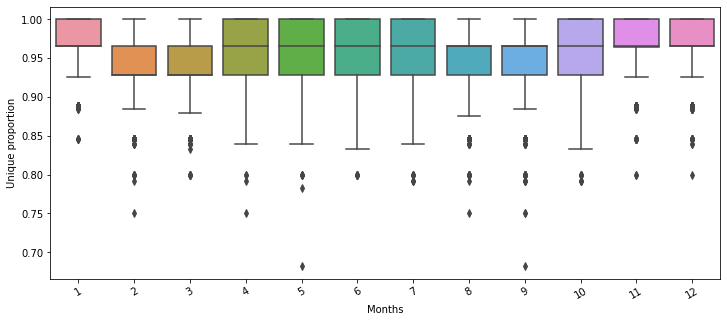

In [19]:
uniques.boxplot_proportion_by_month()

`plot_mean_by_days()` Plot the mean number of uniques UUID per days. The mean is computed over each timestamps of the day.

In [20]:
uniques.plot_mean_by_days()

`plot_mean_proportion_by_days()` Plot the mean proportion of uniques UUID per days. The mean is computed over each timestamps of the day.

In [21]:
uniques.plot_mean_proportion_by_days()

`plot_mean_by_weekday()` Plot the mean number of uniques UUID grouped per week day.

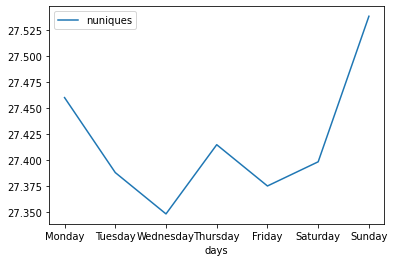

In [22]:
uniques.plot_mean_by_weekday()

`plot_mean_by_weekday()` Plot the mean proportion of uniques UUID grouped per week day.

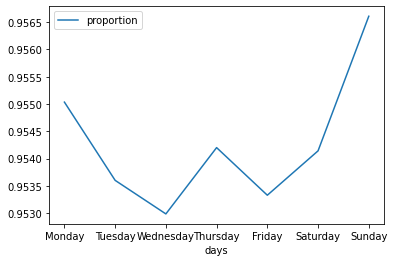

In [23]:
uniques.plot_mean_proportion_by_weekday()

`boxplot_by_weekday()` Plot a boxplot showing the distribution of the uniques UUIDs per weekday

<AxesSubplot:xlabel='Week days', ylabel='Unique number'>

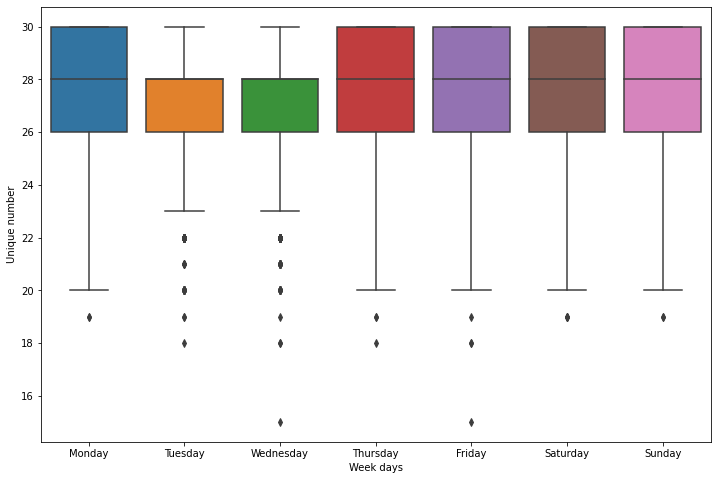

In [24]:
uniques.boxplot_by_weekday()

`boxplot_by_weekday()` Plot a boxplot showing the distribution of the proportion of uniques UUIDs per weekday

In [25]:
uniques.boxplot_proportion_by_weekday()

<AxesSubplot:xlabel='Week days', ylabel='Unique proportion'>

`plot_mean_by_hour()` Plot the mean number of uniques UUID per day hours.

In [26]:
uniques.plot_mean_by_hour()

`plot_mean_proportion_by_hour()` Plot the mean proportion of unique UUID per day hours.

In [27]:
uniques.plot_mean_proportion_by_hour()

`boxplot_by_hour()` Plot a boxplot showing the distribution of the number of uniques UUIDs per day hours.

<AxesSubplot:xlabel='Time (hours)', ylabel='Unique number'>

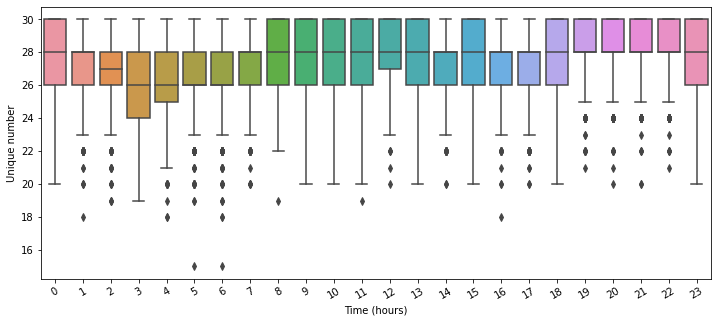

In [28]:
uniques.boxplot_by_hour()

`boxplot_proportion_by_hour()` Plot a boxplot showing the distribution of the proportion of uniques UUIDs per day hours

In [29]:
uniques.boxplot_proportion_by_hour()

<AxesSubplot:xlabel='Time (hours)', ylabel='Unique proportion'>

`plot_mean_by_minute()` Plot the mean number of uniques UUIDs per day minutes.

In [30]:
uniques.plot_mean_by_minute()

`plot_mean_proportion_by_minute()` Plot the mean proportion of uniques UUIDs per day minutes.

In [31]:
uniques.plot_mean_proportion_by_minute()

`boxplot_by_minute()` Plot a boxplot showing the distribution of the proportion of uniques UUIDs per day minutes

<AxesSubplot:xlabel='Time (minutes)', ylabel='Unique number.'>

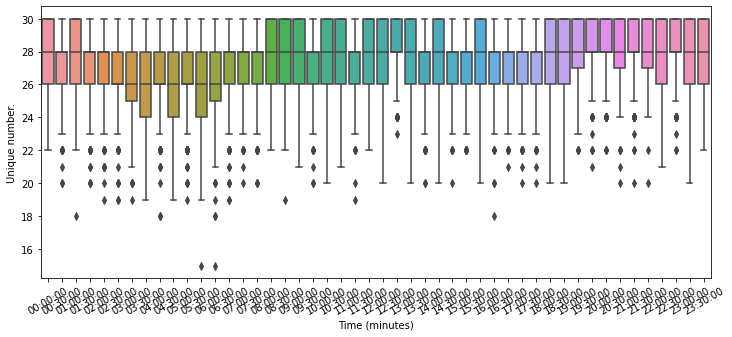

In [32]:
uniques.boxplot_by_minute()

`boxplot_proportion_by_minute()` Plot a boxplot showing the distribution of the proportion of uniques UUIDs per day minutes.

<AxesSubplot:xlabel='Time (minutes)', ylabel='Unique proportion.'>

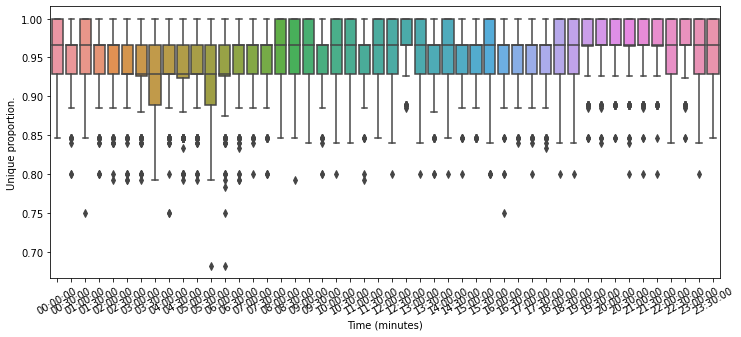

In [33]:
uniques.boxplot_proportion_by_minute()